# Anomaly Detection

### Dataset

Data Source: https://github.com/numenta/NAB/tree/master/data Using the nyc_taxi.csv

nyc_taxi.csv: Number of NYC taxi passengers, where the five anomalies occur during the NYC marathon, Thanksgiving, Christmas, New Years day, and a snow storm. The raw data is from the NYC Taxi and Limousine Commission. The data file included here consists of aggregating the total number of taxi passengers into 30 minute buckets.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data and explore
#### This dataset is well organized, has no null value. Data are ordered, timestamped, single-valued metrics.

In [3]:
df = pd.read_csv('./data/nyc_taxi.csv', parse_dates=['timestamp'], infer_datetime_format=True)
df.head(4)

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656


In [5]:
df.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


Text(0.5,0,'Time')

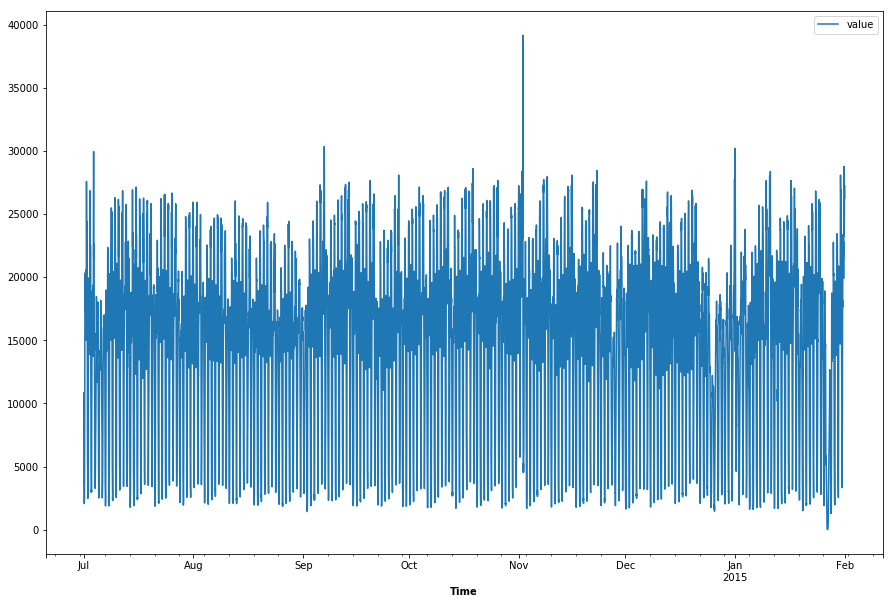

In [9]:
df.plot (y = 'value', x = 'timestamp', figsize=(15,10))
plt.xlabel ('Time', fontweight = 'bold')

First, we group the data by day, replot and see if we can get more info from it.

In [19]:
df_new = pd.DataFrame()
df_new['date'] = df.timestamp.apply(lambda t:t.date())
df_new['time'] = df.timestamp.apply(lambda t:t.time())
df_new['hours'] = df.timestamp.dt.hour

df_new['value'] = df['value']